# Notes

# Load Modules

In [1]:
library(dplyr)
library(tidyr)
library(scater)
library(Seurat)
library(cowplot)
library(harmony)
library(destiny)
library(monocle3)
library(TSCAN)
library(uwot)
library(slingshot)
library(mclust)
library(SpatialPCA)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, 

# Load Data

In [ ]:
counts_df = read.csv('mouse1_slice221_exp.csv', row.names=1, colClasses = c("character", rep("numeric", 254)))
head(counts_df)

X1700022I11Rik X1810046K07Rik
100029194729477472162047791686277547250 0              0.6390480     
100141638384685944504186567613653468492 0              1.2571113     
100199724260696365101982675842433317515 0              0.0000000     
100216512810042512738054357433364423486 0              0.6115955     
100375818383721597063890253100110999488 0              0.0000000     
100419841609373151440771633518061001875 0              0.0000000     
                                        X5031425F14Rik X5730522E02Rik Acta2    
100029194729477472162047791686277547250 0.0000000      0.0000000      1.2780960
100141638384685944504186567613653468492 0.6285557      0.0000000      1.2571113
100199724260696365101982675842433317515 0.0000000      0.0000000      0.0000000
100216512810042512738054357433364423486 0.0000000      0.6115955      1.2231909
100375818383721597063890253100110999488 0.0000000      0.0000000      0.0000000
100419841609373151440771633518061001875 0.0000000      0.0000000      0.9455175
                                        Adam2 Adamts2  Adamts4   Adra1b   Alk ⋯
100029194729477472162047791686277547250 0     0.000000 0.0000000 0.000000 0   ⋯
100141638384685944504186567613653468492 0     0.000000 0.0000000 0.000000 0   ⋯
100199724260696365101982675842433317515 0     0.000000 0.0000000 0.000000 0   ⋯
100216512810042512738054357433364423486 0     0.000000 0.6115955 7.950741 0   ⋯
100375818383721597063890253100110999488 0     0.000000 0.0000000 3.459550 0   ⋯
100419841609373151440771633518061001875 0     1.891035 0.0000000 0.000000 0   ⋯
                                        Gad2      Tac2      Lamp5      Cnr1    
100029194729477472162047791686277547250 2.3102531 0.8293253 0.47412070 0.132923
100141638384685944504186567613653468492 1.5820222 0.7426963 0.30145700 0.000000
100199724260696365101982675842433317515 1.0196304 0.6157625 0.20718534 0.000000
100216512810042512738054357433364423486 3.0655537 1.2066092 0.15789257 0.000000
100375818383721597063890253100110999488 1.1326288 0.9298379 1.25099100 0.000000
100419841609373151440771633518061001875 0.9476848 0.5507928 0.06269877 0.000000
                                        Pvalb     Sst        Rab3b    
100029194729477472162047791686277547250 0.3271664 0.06027859 0.6904925
100141638384685944504186567613653468492 0.4732067 0.11092527 0.4557036
100199724260696365101982675842433317515 0.1727053 0.03971257 0.4372754
100216512810042512738054357433364423486 0.6463524 0.33936298 0.8726526
100375818383721597063890253100110999488 0.2060872 0.26840475 1.2930505
100419841609373151440771633518061001875 0.2189651 0.07730440 0.2851624
                                        Slc17a7    Penk      Gad1      
100029194729477472162047791686277547250  8.5385110 0.2992632 0.00000000
100141638384685944504186567613653468492  6.4248420 0.2671113 0.06208143
100199724260696365101982675842433317515  6.4085894 0.1536798 0.18281732
100216512810042512738054357433364423486 10.7400670 0.4031600 0.00000000
100375818383721597063890253100110999488 16.5359230 0.4136519 0.00000000
100419841609373151440771633518061001875  0.4800929 0.4444912 0.00000000

In [3]:
dim(counts_df)

[1] 5763  254

In [9]:
meta_df = as.data.frame(read.csv('raw_meta.csv.gz', row.names=1, colClasses = c(rep("character", 6), rep("numeric", 5))))
head(meta_df)

sample_id      slice_id       
10000143038275111136124942858811168393  mouse2_sample4 mouse2_slice31 
100001798412490480358118871918100400402 mouse2_sample5 mouse2_slice160
100006878605830627922364612565348097824 mouse2_sample6 mouse2_slice109
100007228202835962319771548915451072492 mouse1_sample2 mouse1_slice71 
100009332472089331948140672873134747603 mouse2_sample5 mouse2_slice219
100010715656160197135774164899300304589 mouse2_sample6 mouse2_slice289
                                        class_label   subclass label   
10000143038275111136124942858811168393  Other         Astro    Astro_1 
100001798412490480358118871918100400402 Other         Endo     Endo    
100006878605830627922364612565348097824 Other         SMC      SMC     
100007228202835962319771548915451072492 Other         Endo     Endo    
100009332472089331948140672873134747603 Glutamatergic L2/3 IT  L23_IT_3
100010715656160197135774164899300304589 Other         VLMC     VLMC    
                                        x          y           cortical_depth
10000143038275111136124942858811168393   4738.4027  3075.60407 888.11475     
100001798412490480358118871918100400402 -3965.4709  1451.94330 287.55886     
100006878605830627922364612565348097824   805.8489  1215.45862  22.94376     
100007228202835962319771548915451072492  1347.6554 -3589.80336 197.94597     
100009332472089331948140672873134747603 -3584.2169 -1883.21445 308.17863     
100010715656160197135774164899300304589 -2029.4959   -82.66701   0.00000     
                                        leiden_res_10.00 leiden_res_30.00
10000143038275111136124942858811168393   0               117             
100001798412490480358118871918100400402 36               263             
100006878605830627922364612565348097824 46                18             
100007228202835962319771548915451072492 56               215             
100009332472089331948140672873134747603 65               130             
100010715656160197135774164899300304589 24               225

In [12]:
meta_df = meta_df[meta_df$slice_id == "mouse1_slice221",]
head(meta_df)

sample_id      slice_id       
100029194729477472162047791686277547250 mouse1_sample5 mouse1_slice221
100141638384685944504186567613653468492 mouse1_sample5 mouse1_slice221
100199724260696365101982675842433317515 mouse1_sample5 mouse1_slice221
100216512810042512738054357433364423486 mouse1_sample5 mouse1_slice221
100375818383721597063890253100110999488 mouse1_sample5 mouse1_slice221
100419841609373151440771633518061001875 mouse1_sample5 mouse1_slice221
                                        class_label   subclass label       
100029194729477472162047791686277547250 Glutamatergic L2/3 IT  L23_IT_2    
100141638384685944504186567613653468492 Glutamatergic L4/5 IT  L45_IT_SSp_2
100199724260696365101982675842433317515 Glutamatergic L4/5 IT  L45_IT_SSp_2
100216512810042512738054357433364423486 Glutamatergic L6 CT    L6_CT_4     
100375818383721597063890253100110999488 Glutamatergic L5 ET    L5_ET_3     
100419841609373151440771633518061001875 Other         VLMC     VLMC        
                                        x          y         cortical_depth
100029194729477472162047791686277547250   140.9420 -2678.143   85.27653    
100141638384685944504186567613653468492   490.1480 -3128.268  444.29485    
100199724260696365101982675842433317515   610.4404 -3286.205  599.20010    
100216512810042512738054357433364423486  -993.4454 -3621.463 1145.43078    
100375818383721597063890253100110999488 -1210.4549 -3070.840  617.24071    
100419841609373151440771633518061001875 -1269.2059 -2422.237    0.00000    
                                        leiden_res_10.00 leiden_res_30.00
100029194729477472162047791686277547250 48                90             
100141638384685944504186567613653468492 13                93             
100199724260696365101982675842433317515 13               268             
100216512810042512738054357433364423486 14                34             
100375818383721597063890253100110999488 38                72             
100419841609373151440771633518061001875  7                17

In [13]:
print(dim(counts_df))
print(dim(meta_df))

[1] 5763  254
[1] 5763   10


In [14]:
root.use <- rownames(meta_df[which(meta_df$cortical_depth == min(meta_df$cortical_depth, na.rm=T)),])[[1]]

In [15]:
root.use

[1] "100419841609373151440771633518061001875"

# Create seurat object

In [16]:
ss0 <- CreateSeuratObject(counts = t(counts_df))

In [17]:
ss0@meta.data$x <- meta_df$x
ss0@meta.data$y <- meta_df$y
ss0@meta.data$subclass <- meta_df$subclass
head(ss0@meta.data)

orig.ident    nCount_RNA nFeature_RNA
100029194729477472162047791686277547250 SeuratProject 316.7963   106         
100141638384685944504186567613653468492 SeuratProject 307.9906    93         
100199724260696365101982675842433317515 SeuratProject 288.2651    39         
100216512810042512738054357433364423486 SeuratProject 305.9161    96         
100375818383721597063890253100110999488 SeuratProject 391.3923    81         
100419841609373151440771633518061001875 SeuratProject 236.6938    69         
                                        x          y         subclass
100029194729477472162047791686277547250   140.9420 -2678.143 L2/3 IT 
100141638384685944504186567613653468492   490.1480 -3128.268 L4/5 IT 
100199724260696365101982675842433317515   610.4404 -3286.205 L4/5 IT 
100216512810042512738054357433364423486  -993.4454 -3621.463 L6 CT   
100375818383721597063890253100110999488 -1210.4549 -3070.840 L5 ET   
100419841609373151440771633518061001875 -1269.2059 -2422.237 VLMC

In [18]:
ss0

An object of class Seurat 
254 features across 5763 samples within 1 assay 
Active assay: RNA (254 features, 0 variable features)

In [19]:
ss0 <- NormalizeData(ss0)
ss0 <- FindVariableFeatures(ss0)
ss0 <- ScaleData(ss0)

Centering and scaling data matrix



In [20]:
ss0 <- RunPCA(ss0)

PC_ 1 
Positive:  Cobll1, Flt1, Cldn5, Plekhg3, Unc5b, Timp3, Pdlim5, Bgn, Daam2, Opalin 
	   Prox1, Sox10, Igf2, Gfap, Vtn, Nr2f2, Ptprm, Cspg4, Cd14, Myh14 
	   Enpp6, Rgs5, Gad1, Cnr1, Egfr, Adamts4, Serpinf1, Pxdc1, Tbc1d4, Kcnj8 
Negative:  Syndig1, Satb2, Cdh12, Wipf3, Epha7, Slc17a7, Nr4a1, Unc5d, Slc30a3, Grm8 
	   Prdm8, Rgs6, Cbln2, Grm1, C1ql3, Col25a1, Tenm3, Shisa9, Ptprt, Prss12 
	   Sertm1, Brinp3, Olfm3, Ramp1, Iqgap2, Prr16, Rfx3, Fam19a2, Flrt3, Cntnap5b 
PC_ 2 
Positive:  Bcl11b, Foxp2, Syt6, Sema5a, Cdh9, Ano4, Ptpru, Fezf2, Dscaml1, Sulf1 
	   Prss23, Spon1, Hs3st5, Cdh13, Iqgap2, Rnf152, Grm8, Syt10, Igfbp4, Adamts4 
	   Sema3e, Sulf2, Rab3b, Penk, Pou6f2, Cnr1, Oprk1, Tox, Blnk, Meis2 
Negative:  Cux2, Lamp5, Rorb, Prr16, Fam19a2, Slc17a6, Unc5d, Slc30a3, Rspo1, Calb1 
	   Cbln4, Prdm8, Ptprk, Barx2, Tcap, Cd24a, C1ql3, Ntng2, Cdh12, Tmtc2 
	   Cntnap5b, Ptprt, Phactr2, Pou3f3, Ankfn1, Thsd7a, Trpc4, Brinp3, Bdnf, Chrm2 
PC_ 3 
Positive:  Cldn5, Flt1, Rgs5, Vtn, 

In [21]:
ss0 <- FindNeighbors(ss0, dims = 1:30, reduction = "pca")
ss0 <- FindClusters(ss0, resolution = 2, cluster.name = "unintegrated_clusters")

Computing nearest neighbor graph

Computing SNN

Warning message:
“The following arguments are not used: cluster.name”
Warning message:
“The following arguments are not used: cluster.name”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5763
Number of edges: 251152

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8459
Number of communities: 27
Elapsed time: 0 seconds


In [22]:
ss0 <- RunUMAP(ss0, dims = 1:30, reduction = "pca", reduction.name = "umap")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:29:53 UMAP embedding parameters a = 0.9922 b = 1.112

20:29:53 Read 5763 rows and found 30 numeric columns

20:29:53 Using Annoy for neighbor search, n_neighbors = 30

20:29:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:29:54 Writing NN index file to temp file /tmp/RtmpqeEAC2/file4a57525b936c

20:29:54 Searching Annoy index using 1 thread, search_k = 3000

20:29:57 Annoy recall = 100%

20:29:58 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

# DPT

In [23]:
dm.use = DiffusionMap(t(ss0@assays$RNA@scale.data))

Warning message:
“'as(<dsCMatrix>, "dsTMatrix")' is deprecated.
Use 'as(., "TsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").”


In [24]:
ss0[['dmap']] <- CreateDimReducObject(embeddings = dm.use@eigenvectors,assay = 'RNA',stdev = dm.use@eigenvalues,key = 'DC_')

In [25]:
dpt.use <- DPT(dm.use,tips = match(root.use,rownames(dm.use@eigenvectors)))
dpt_rank <- rank(dpt.use$dpt,ties.method = 'random', na.last = 'keep')
ss0@meta.data$dpt_norm <- scales::rescale(dpt_rank,to = c(0,1))
ss0@meta.data$dpt = dpt.use$dpt

In [26]:
head(ss0@meta.data)

orig.ident    nCount_RNA nFeature_RNA
100029194729477472162047791686277547250 SeuratProject 316.7963   106         
100141638384685944504186567613653468492 SeuratProject 307.9906    93         
100199724260696365101982675842433317515 SeuratProject 288.2651    39         
100216512810042512738054357433364423486 SeuratProject 305.9161    96         
100375818383721597063890253100110999488 SeuratProject 391.3923    81         
100419841609373151440771633518061001875 SeuratProject 236.6938    69         
                                        x          y         subclass
100029194729477472162047791686277547250   140.9420 -2678.143 L2/3 IT 
100141638384685944504186567613653468492   490.1480 -3128.268 L4/5 IT 
100199724260696365101982675842433317515   610.4404 -3286.205 L4/5 IT 
100216512810042512738054357433364423486  -993.4454 -3621.463 L6 CT   
100375818383721597063890253100110999488 -1210.4549 -3070.840 L5 ET   
100419841609373151440771633518061001875 -1269.2059 -2422.237 VLMC    
                                        RNA_snn_res.2 seurat_clusters dpt_norm 
100029194729477472162047791686277547250 14            14              0.8019785
100141638384685944504186567613653468492 2             2               0.6961125
100199724260696365101982675842433317515 17            17              0.3684485
100216512810042512738054357433364423486 6             6               0.7190212
100375818383721597063890253100110999488 13            13              0.5602221
100419841609373151440771633518061001875 11            11              0.0000000
                                        dpt       
100029194729477472162047791686277547250 0.09361221
100141638384685944504186567613653468492 0.08986795
100199724260696365101982675842433317515 0.06005953
100216512810042512738054357433364423486 0.09063718
100375818383721597063890253100110999488 0.08256559
100419841609373151440771633518061001875 0.00000000

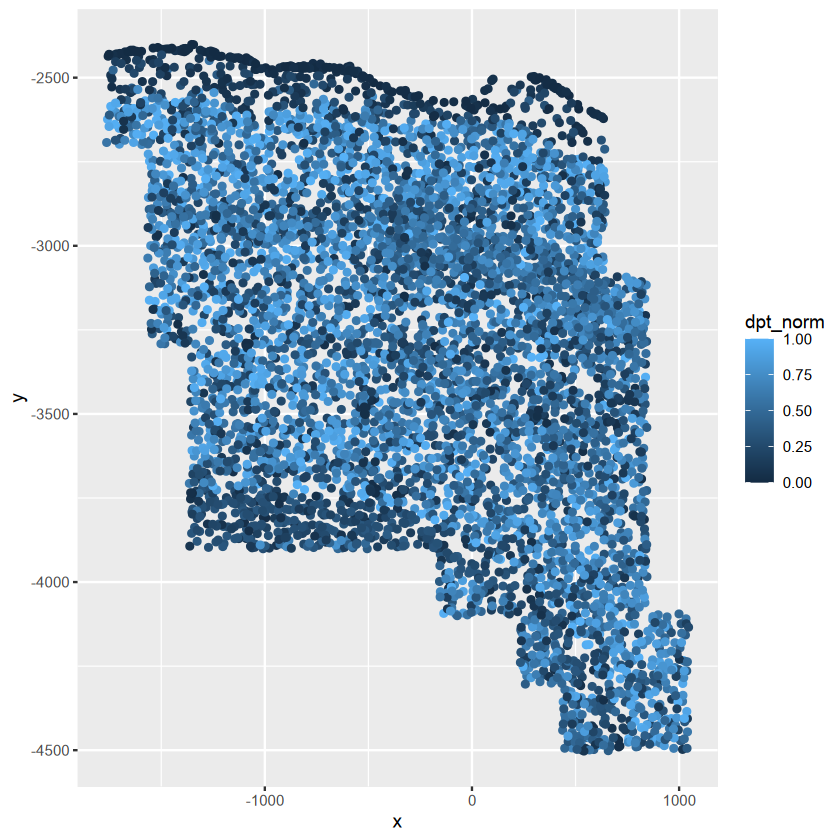

In [27]:
ggplot(ss0@meta.data, aes(x = x, y = y, color = dpt_norm)) +
  geom_point()

# monocle

In [28]:
gene_annotation <- as.data.frame(colnames(counts_df), row.names = colnames(counts_df))
colnames(gene_annotation) <- "gene_short_name"

cds <- new_cell_data_set(t(counts_df),
                         cell_metadata = meta_df,
                         gene_metadata = gene_annotation)

In [29]:
cds <- preprocess_cds(cds)

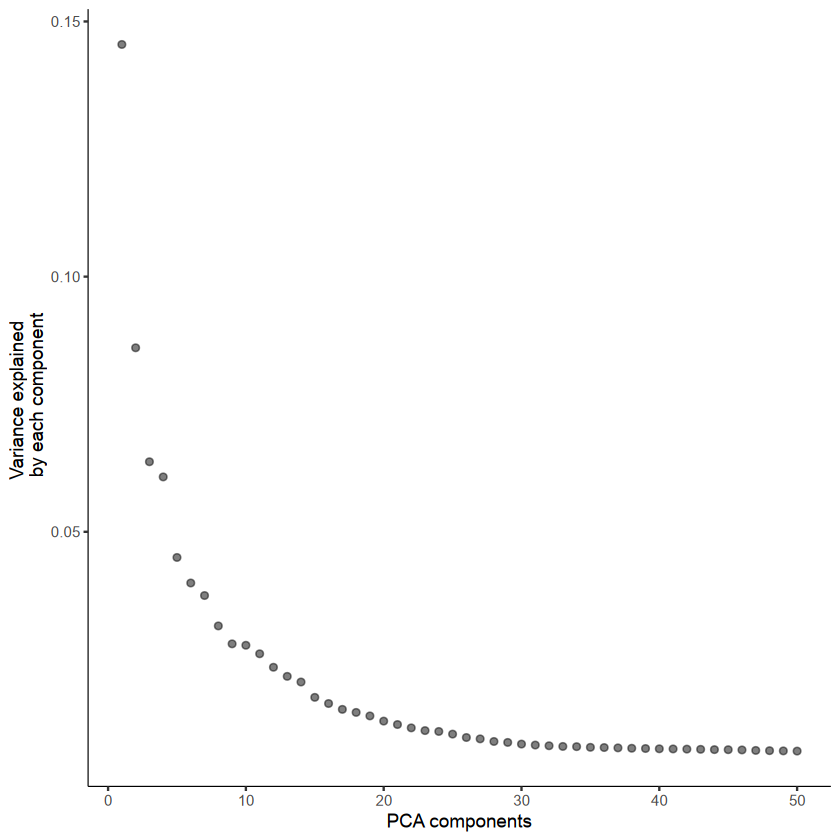

In [30]:
plot_pc_variance_explained(cds)

In [31]:
cds <- reduce_dimension(cds,
                        reduction_method = "UMAP",
                        # umap.n_neighbors = 100,
                        # umap.metric ='euclidean',
                        umap.min_dist = 50,
                        spread = 100,
                        preprocess_method = "PCA")


No trajectory to plot. Has learn_graph() been called yet?



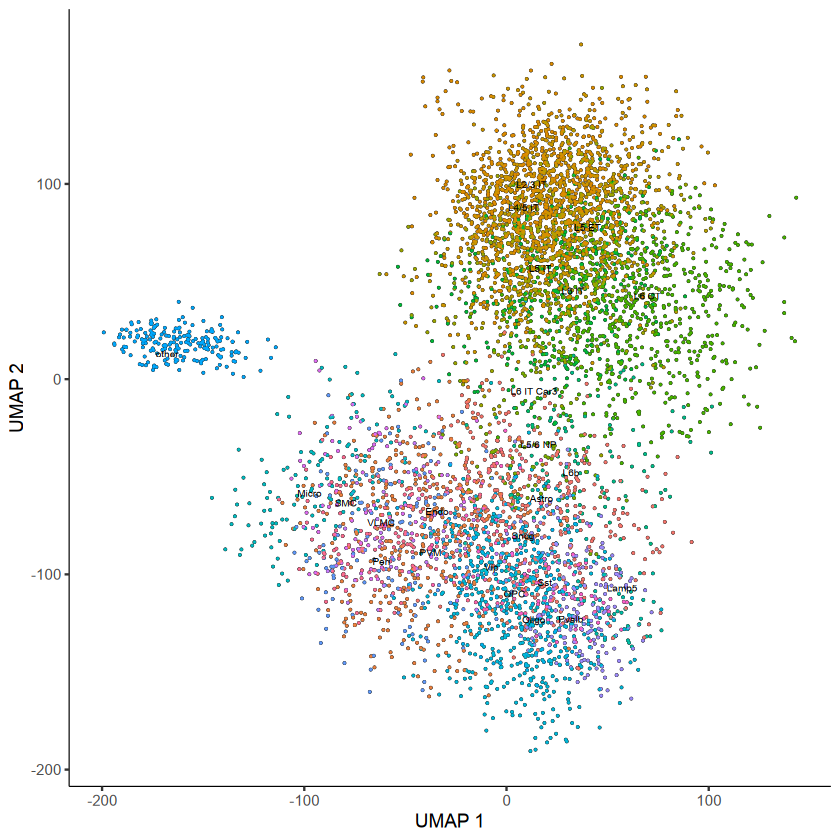

In [33]:
plot_cells(cds, label_groups_by_cluster=FALSE,  color_cells_by = "subclass")

In [34]:
cds <- cluster_cells(cds, reduction_method = "UMAP")

In [35]:
cds <- learn_graph(cds, use_partition=TRUE)

  |======================================================================| 100%


In [36]:
cds <- order_cells(cds, root_cells=root.use)

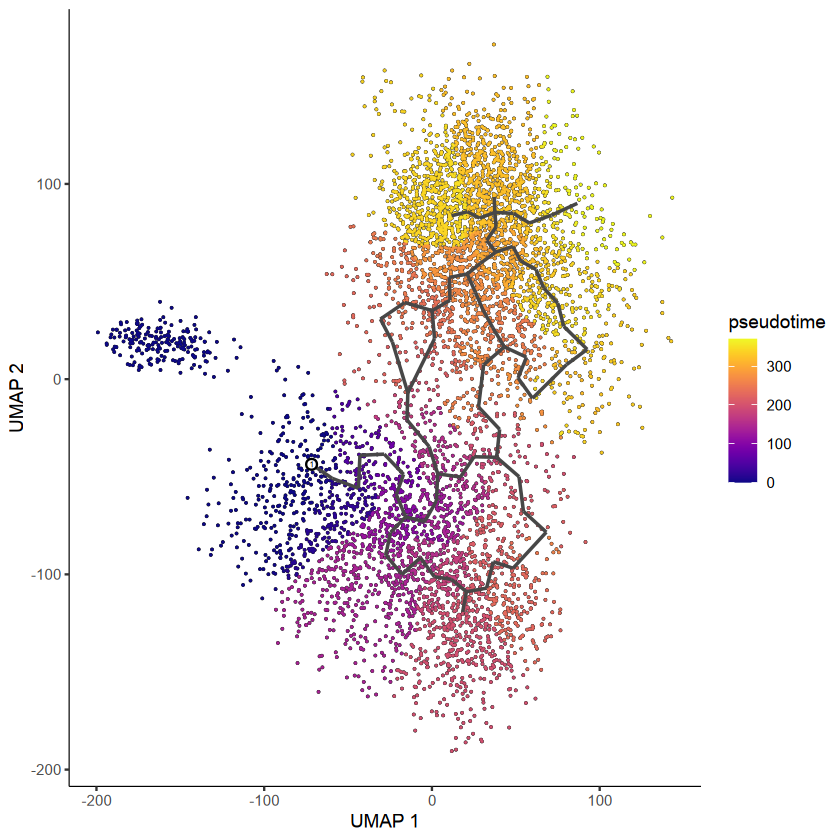

In [37]:
plot_cells(cds,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)

In [38]:
pseudotime <- pseudotime(cds)
pseudotime[is.infinite(pseudotime)] = NA

In [39]:
length(pseudotime)

[1] 5763

In [40]:
monocle3_rank <- rank(pseudotime,ties.method = 'random', na.last = 'keep')
monocle3_norm <- scales::rescale(monocle3_rank,to = c(0,1))

In [41]:
ss0@meta.data$monocle3_norm <- monocle3_norm
ss0@meta.data$monocle3 <- pseudotime

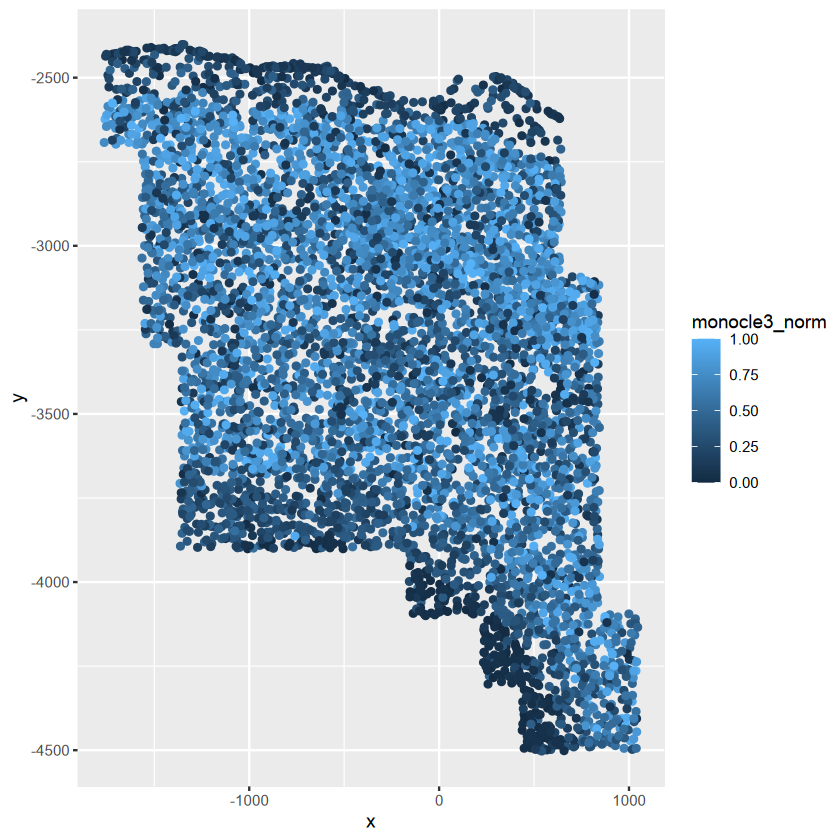

In [42]:
ggplot(ss0@meta.data, aes(x = x, y = y, color = monocle3_norm)) +
  geom_point()

# TSCAN

In [43]:
exp <- as.matrix(ss0@assays$RNA@data)
procdata <- preprocess(exp, minexpr_value = 0, minexpr_percent = 0.001, cvcutoff = 0.01)


In [44]:
lpsmclust <- exprmclust(procdata)


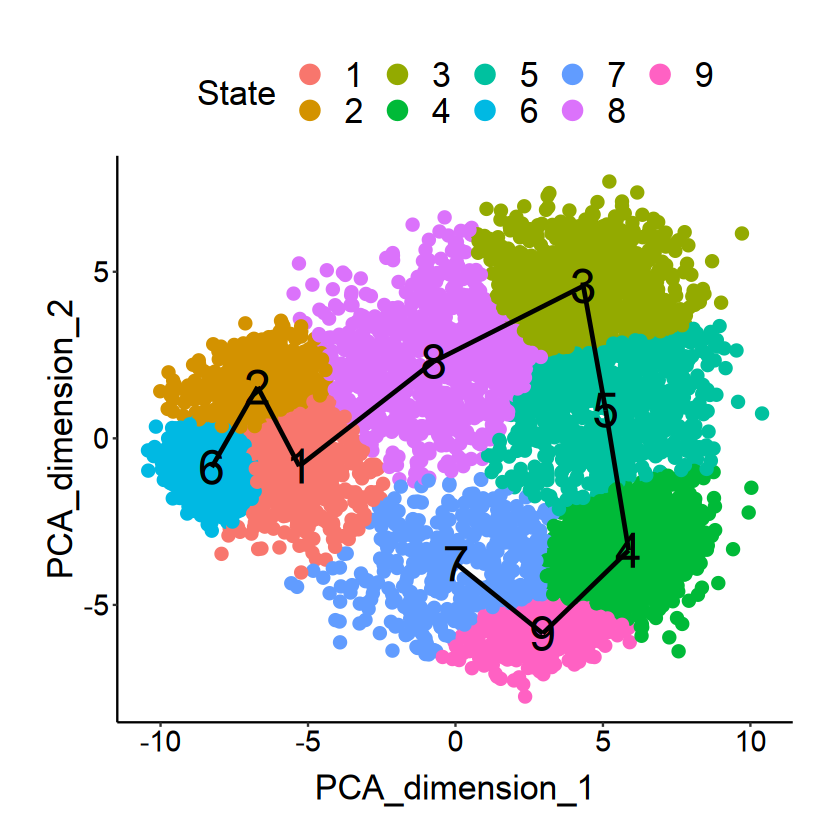

In [45]:
plotmclust(lpsmclust)

In [46]:
tscan_order = TSCANorder(lpsmclust)

In [47]:
tail(tscan_order)

sample_name                            
273264701440460443611294224329873743589 273264701440460443611294224329873743589
322857088441860570783617668495522705918 322857088441860570783617668495522705918
233000942976240004572190210544617061160 233000942976240004572190210544617061160
231914101443862629297626975099872061285 231914101443862629297626975099872061285
233667239291478775192594173083721618407 233667239291478775192594173083721618407
11820942837647121178411105234055612792  11820942837647121178411105234055612792 
                                        State Pseudotime
273264701440460443611294224329873743589 7     5758      
322857088441860570783617668495522705918 7     5759      
233000942976240004572190210544617061160 7     5760      
231914101443862629297626975099872061285 7     5761      
233667239291478775192594173083721618407 7     5762      
11820942837647121178411105234055612792  7     5763

In [48]:
tscan_rank = rank(tscan_order[rownames(ss0@meta.data),"Pseudotime"], ties.method = 'random', na.last = 'keep')
tscan_norm = scales::rescale(tscan_rank,to = c(0,1))
ss0@meta.data$tscan_norm = tscan_norm
ss0@meta.data$tscan = tscan_order[rownames(ss0@meta.data),"Pseudotime"]

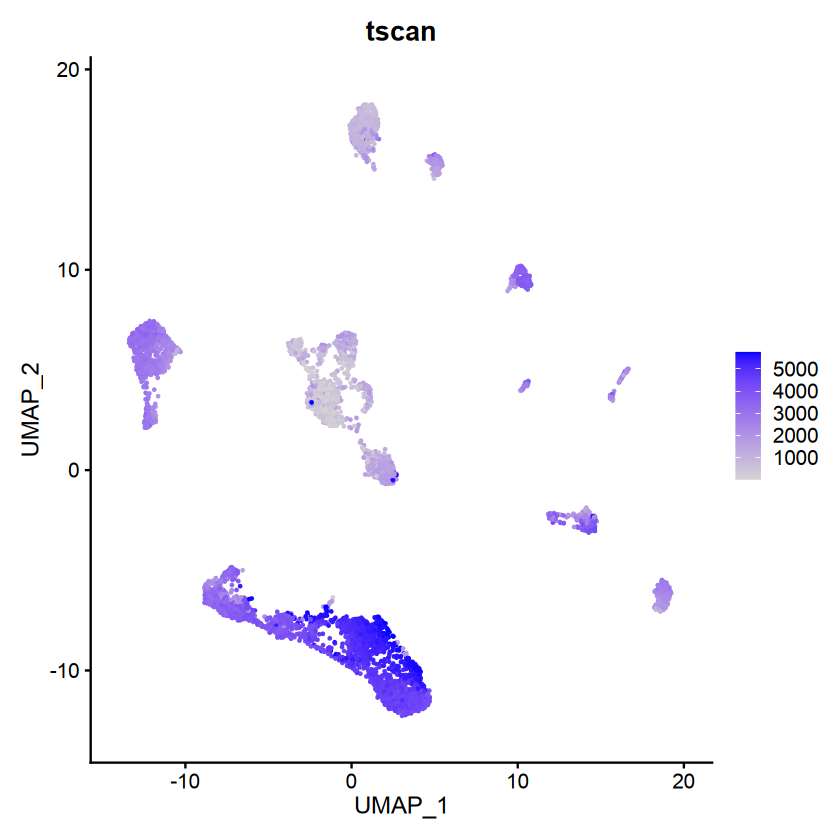

In [49]:
FeaturePlot(ss0, features = c("tscan"), reduction = "umap")

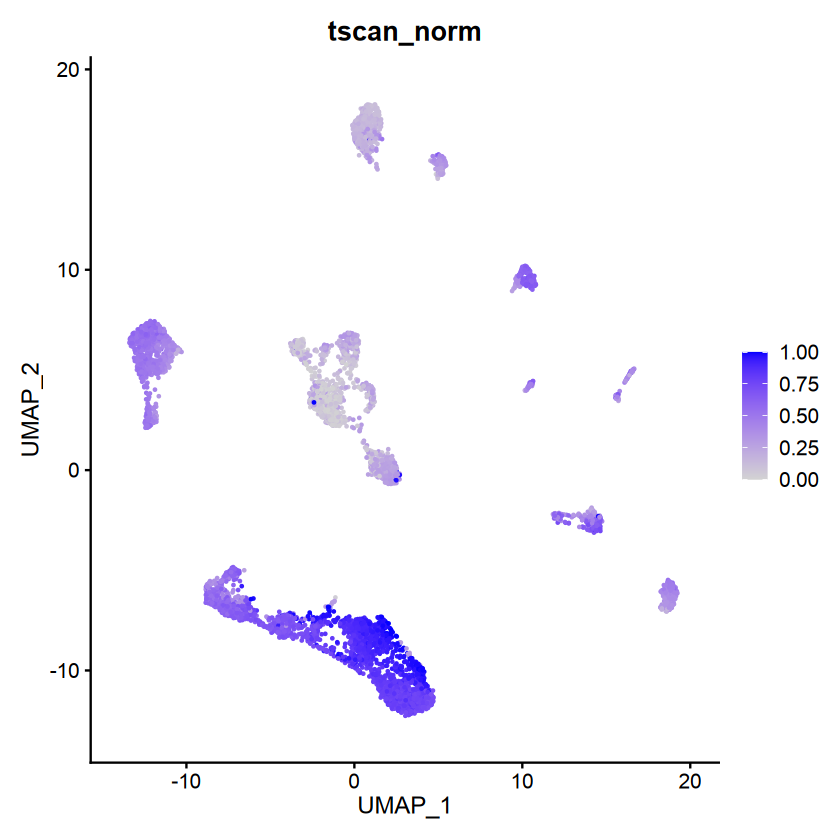

In [50]:
FeaturePlot(ss0, features = c("tscan_norm"), reduction = "umap")

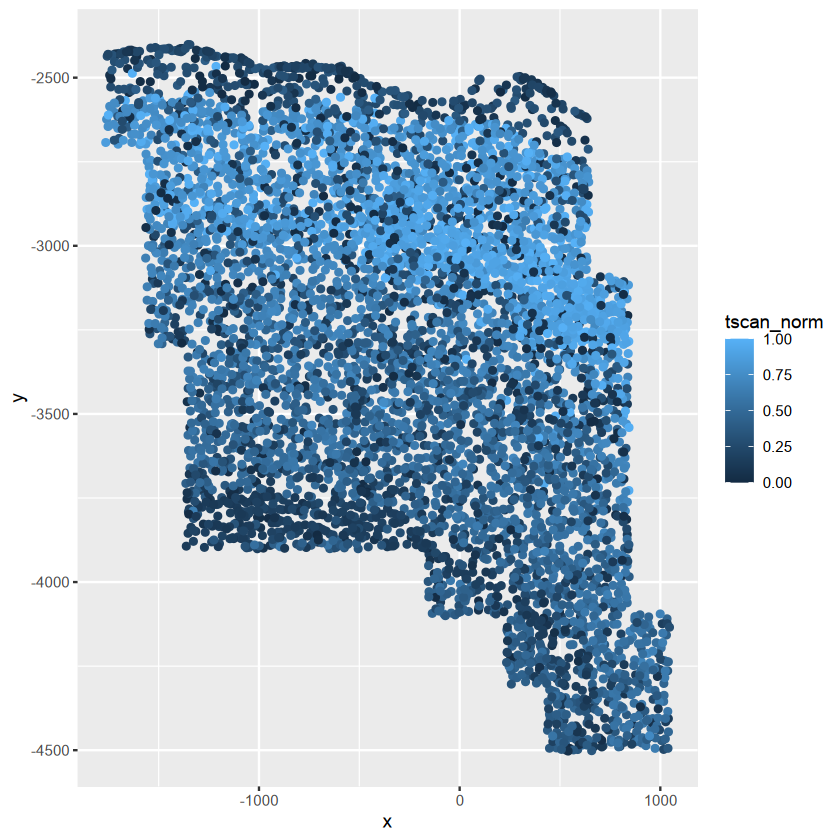

In [51]:
ggplot(ss0@meta.data, aes(x = x, y = y, color = tscan_norm)) +
  geom_point()

# SpatialPCA

In [52]:
spatialPCA.obj = CreateSpatialPCAObject(counts=as.matrix(t(counts_df)), location=as.matrix(meta_df[,c('x','y')]), project = "SpatialPCA",gene.type="spatial",sparkversion="spark",numCores_spark=5,gene.number=3000, customGenelist=NULL,min.loctions = 2, min.features=2)


## Use SCTransform function in Seurat to normalize data. 


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 254 by 5763

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 254 genes, 5000 cells



  |======================================================================| 100%


Found 4 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 254 genes



  |======================================================================| 100%


Computing corrected count matrix for 254 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 10.38963 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



## Use spark.test function in SPARK package to select spatially variable genes. 
## ===== SPARK INPUT INFORMATION ==== 
## number of total samples:  5763 
## number of total features:  218 
## number of adjusted covariates:  0 
# fitting normalized count-based spatial model under the null hypothesis ... 
## testing Gaussian kernel: 1...
## testing Periodic kernel: 1...
## testing Gaussian kernel: 2...
## testing Periodic kernel: 2...
## testing Gaussian kernel: 3...
## testing Periodic kernel: 3...
## testing Gaussian kernel: 4...
## testing Periodic kernel: 4...
## testing Gaussian kernel: 5...
## testing Periodic kernel: 5...
## Identified  210  spatial genes through spark.test function. 
The  number of significant spatial genes is less than the specified number of spatial genes. 
## Using  210  significant spatially variable genes. 


In [53]:
spatialPCA.obj = SpatialPCA_buildKernel(spatialPCA.obj, kerneltype="gaussian", bandwidthtype="SJ",bandwidth.set.by.user=NULL)
spatialPCA.obj = SpatialPCA_EstimateLoading(spatialPCA.obj,fast=FALSE,SpatialPCnum=10) 
spatialPCA.obj = SpatialPCA_SpatialPCs(spatialPCA.obj, fast=FALSE)

## Selected kernel type is:  gaussian  
## The bandwidth is:  0.00809757417403748  
## Calculating kernel matrix
## Finished calculating kernel matrix.
[1] "Eigen decomposition on kernel matrix!"
[1] "Using all eigenvectors and eigenvalues in the Kernel matrix!"


In [54]:
round(sqrt(dim(spatialPCA.obj@SpatialPCs)[2]))

[1] 76

In [55]:
clusterlabel= walktrap_clustering(clusternum=6,latent_dat=spatialPCA.obj@SpatialPCs,knearest=76 ) 
# here for all 12 samples in LIBD, we set the same k nearest number in walktrap_clustering to be 70. 
# for other Visium or ST data, the user can also set k nearest number as round(sqrt(dim(SpatialPCAobject@SpatialPCs)[2])) by default


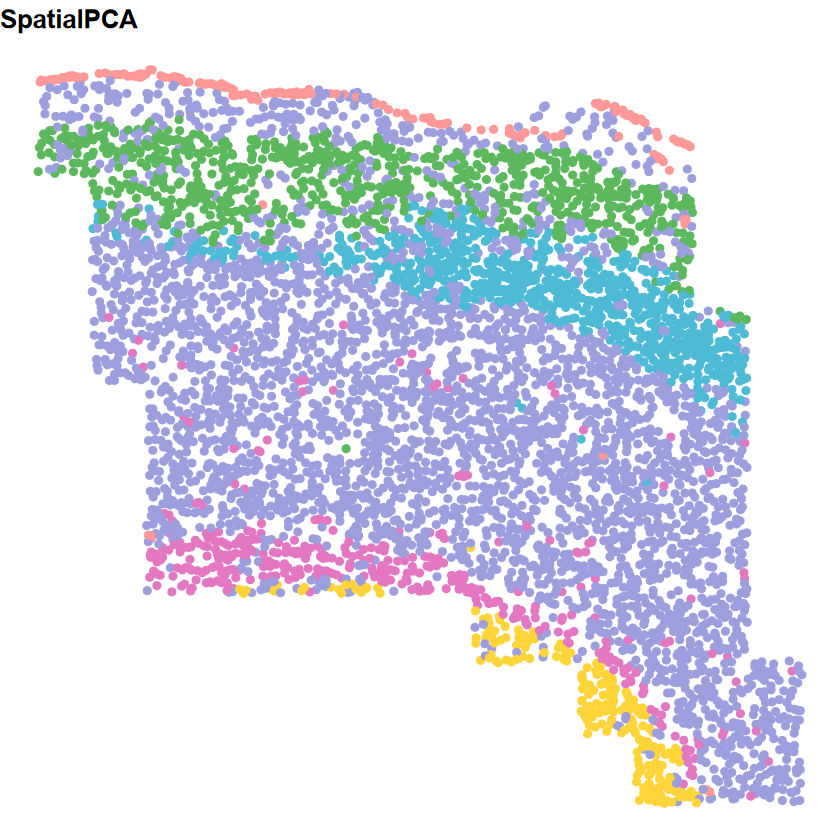

In [56]:
cbp=c("#9C9EDE" ,"#5CB85C" ,"#E377C2", "#4DBBD5" ,"#FED439" ,"#FF9896", "#FFDC91")
plot_cluster(location=as.matrix(meta_df[,c('x','y')]),clusterlabel=clusterlabel,pointsize=1.5,title_in=paste0("SpatialPCA"),color_in=cbp)

                  Length Class              Mode   
clusterlabel      5763   factor             numeric
slingshot         5763   PseudotimeOrdering S4     
slingPseudotime_1 5763   -none-             numeric
slingPseudotime_2 5763   -none-             numeric
slingPseudotime_3 5763   -none-             numeric

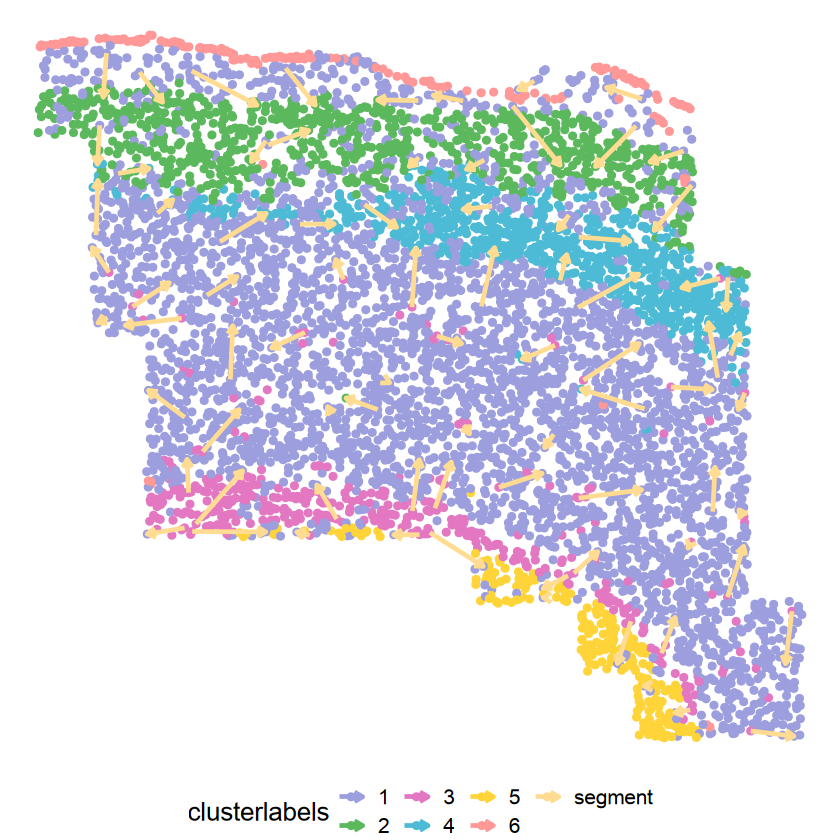

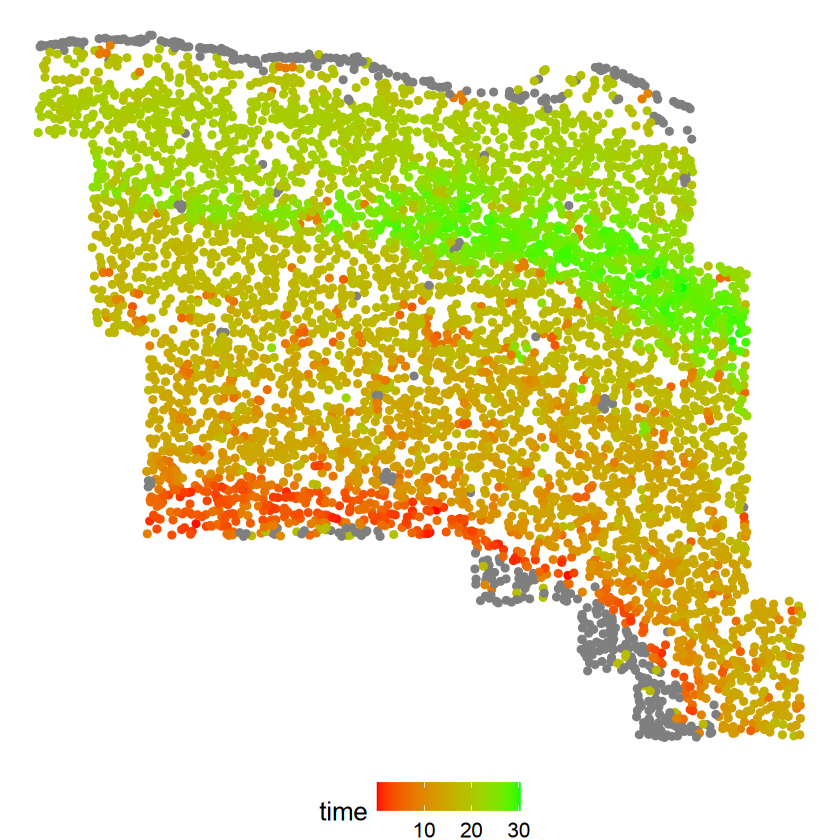

In [57]:
sce <- SingleCellExperiment(assays = as.matrix(t(counts_df)))
reducedDims(sce) <- SimpleList(DRM = t(spatialPCA.obj@SpatialPCs))
colData(sce)$clusterlabel <- factor(clusterlabel)    
sce <- slingshot(sce, clusterLabels = 'clusterlabel', reducedDim = 'DRM',start.clus="3" ) 
# in this data we set white matter region as start cluster, one can change to their preferred start region 

summary(sce@colData@listData)
pseudotime_traj1 = sce@colData@listData$slingPseudotime_1 # in this data only one trajectory was inferred
gridnum = 10
color_in = c("#9C9EDE" ,"#5CB85C" ,"#E377C2", "#4DBBD5" ,"#FED439" ,"#FF9896", "#FFDC91","black")
p_traj1 = plot_trajectory(pseudotime_traj1, spatialPCA.obj@location,clusterlabel,gridnum,color_in,pointsize=1.5 ,arrowlength=0.2,arrowsize=1,textsize=15 )
p_traj1$Arrowoverlay1
p_traj1$Pseudotime

In [58]:
spatialpca_rank <- rank(pseudotime_traj1,ties.method = 'random', na.last = 'keep')
spatialpca_norm <- scales::rescale(spatialpca_rank,to = c(0,1))

In [59]:
ss0@meta.data$spatialpca_norm <- spatialpca_norm
ss0@meta.data$spatialpca <- pseudotime_traj1

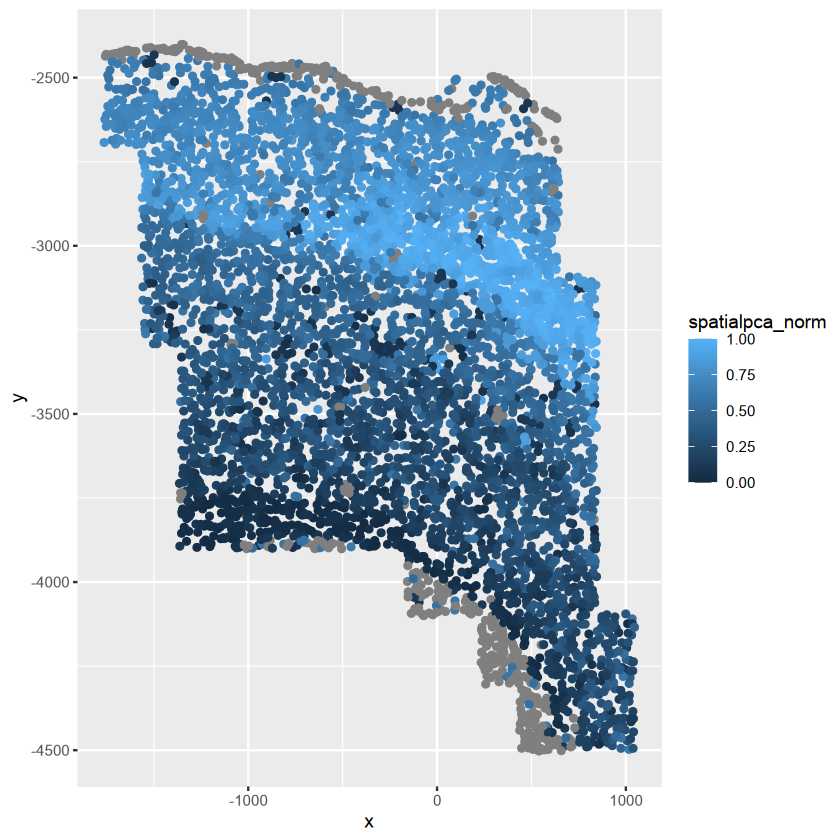

In [60]:
ggplot(ss0@meta.data, aes(x = x, y = y, color = spatialpca_norm)) +
  geom_point()

# Output

In [61]:
head(ss0@meta.data)

orig.ident    nCount_RNA nFeature_RNA
100029194729477472162047791686277547250 SeuratProject 316.7963   106         
100141638384685944504186567613653468492 SeuratProject 307.9906    93         
100199724260696365101982675842433317515 SeuratProject 288.2651    39         
100216512810042512738054357433364423486 SeuratProject 305.9161    96         
100375818383721597063890253100110999488 SeuratProject 391.3923    81         
100419841609373151440771633518061001875 SeuratProject 236.6938    69         
                                        x          y         subclass
100029194729477472162047791686277547250   140.9420 -2678.143 L2/3 IT 
100141638384685944504186567613653468492   490.1480 -3128.268 L4/5 IT 
100199724260696365101982675842433317515   610.4404 -3286.205 L4/5 IT 
100216512810042512738054357433364423486  -993.4454 -3621.463 L6 CT   
100375818383721597063890253100110999488 -1210.4549 -3070.840 L5 ET   
100419841609373151440771633518061001875 -1269.2059 -2422.237 VLMC    
                                        RNA_snn_res.2 seurat_clusters dpt_norm 
100029194729477472162047791686277547250 14            14              0.8019785
100141638384685944504186567613653468492 2             2               0.6961125
100199724260696365101982675842433317515 17            17              0.3684485
100216512810042512738054357433364423486 6             6               0.7190212
100375818383721597063890253100110999488 13            13              0.5602221
100419841609373151440771633518061001875 11            11              0.0000000
                                        dpt        monocle3_norm monocle3    
100029194729477472162047791686277547250 0.09361221 0.65463381    3.019727e+02
100141638384685944504186567613653468492 0.08986795 0.61124610    2.808093e+02
100199724260696365101982675842433317515 0.06005953 0.92710864    3.410838e+02
100216512810042512738054357433364423486 0.09063718 0.93162096    3.422686e+02
100375818383721597063890253100110999488 0.08256559 0.98871919    3.702277e+02
100419841609373151440771633518061001875 0.00000000 0.02464422    2.136527e-03
                                        tscan_norm tscan spatialpca_norm
100029194729477472162047791686277547250 0.8099618  4668  0.7430358      
100141638384685944504186567613653468492 0.8899688  5129  0.9962100      
100199724260696365101982675842433317515 0.9876779  5692  0.9205988      
100216512810042512738054357433364423486 0.5392225  3108  0.3572105      
100375818383721597063890253100110999488 0.4505380  2597  0.4496873      
100419841609373151440771633518061001875 0.2054842  1185         NA      
                                        spatialpca
100029194729477472162047791686277547250 20.80971  
100141638384685944504186567613653468492 29.19253  
100199724260696365101982675842433317515 26.29218  
100216512810042512738054357433364423486 15.22212  
100375818383721597063890253100110999488 17.04655  
100419841609373151440771633518061001875       NA

In [62]:
pseudotime_output = ss0@meta.data[,c('x', 'y', 'dpt', 'monocle3','tscan','spatialpca','dpt_norm', 'monocle3_norm','tscan_norm','spatialpca_norm')]
head(pseudotime_output)

x          y         dpt       
100029194729477472162047791686277547250   140.9420 -2678.143 0.09361221
100141638384685944504186567613653468492   490.1480 -3128.268 0.08986795
100199724260696365101982675842433317515   610.4404 -3286.205 0.06005953
100216512810042512738054357433364423486  -993.4454 -3621.463 0.09063718
100375818383721597063890253100110999488 -1210.4549 -3070.840 0.08256559
100419841609373151440771633518061001875 -1269.2059 -2422.237 0.00000000
                                        monocle3     tscan spatialpca dpt_norm 
100029194729477472162047791686277547250 3.019727e+02 4668  20.80971   0.8019785
100141638384685944504186567613653468492 2.808093e+02 5129  29.19253   0.6961125
100199724260696365101982675842433317515 3.410838e+02 5692  26.29218   0.3684485
100216512810042512738054357433364423486 3.422686e+02 3108  15.22212   0.7190212
100375818383721597063890253100110999488 3.702277e+02 2597  17.04655   0.5602221
100419841609373151440771633518061001875 2.136527e-03 1185        NA   0.0000000
                                        monocle3_norm tscan_norm
100029194729477472162047791686277547250 0.65463381    0.8099618 
100141638384685944504186567613653468492 0.61124610    0.8899688 
100199724260696365101982675842433317515 0.92710864    0.9876779 
100216512810042512738054357433364423486 0.93162096    0.5392225 
100375818383721597063890253100110999488 0.98871919    0.4505380 
100419841609373151440771633518061001875 0.02464422    0.2054842 
                                        spatialpca_norm
100029194729477472162047791686277547250 0.7430358      
100141638384685944504186567613653468492 0.9962100      
100199724260696365101982675842433317515 0.9205988      
100216512810042512738054357433364423486 0.3572105      
100375818383721597063890253100110999488 0.4496873      
100419841609373151440771633518061001875        NA

In [63]:
write.csv(pseudotime_output, "R_pseudotime_output.csv")

In [64]:
sessionInfo()

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘America/New_York’ (or equivalent)”


R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /sc/arion/work/wangw32/conda-env/envs/seurat_v4/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.utf8        LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] RSpectra_0.16-1             SpatialPCA_1.3.0           
 [3] mclust_6.1                  slingshot_2.10.0           
 [5] TrajectoryUtils_1.10.1      princurve_2.1.6            
 [7] uwot